In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split

In [101]:
data=pd.read_csv("train_v2.csv")

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [103]:
data.shape

(105471, 771)

### Missing Values

In [104]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [105]:
missing_values_table(data).head(30)

Your selected dataframe has 771 columns.
There are 525 columns that have missing values.


,Missing Values,% of Total Values
f662,18833,17.9
f663,18833,17.9
f159,18736,17.8
f160,18736,17.8
f170,18417,17.5
f169,18417,17.5
f618,18407,17.5
f619,18407,17.5
f331,18067,17.1
f330,18067,17.1


In [106]:
data.fillna(data.mean(),inplace=True)
missing_values_table(data).head(30)

Your selected dataframe has 771 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
f206,1291,1.2
f207,1291,1.2
f390,698,0.7
f391,698,0.7
f626,698,0.7
f627,698,0.7
f695,698,0.7
f698,698,0.7
f138,182,0.2
f137,177,0.2


In [107]:
##Delete the row of NA value
data.dropna(inplace=True)
missing_values_table(data)
data.shape

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


(103302, 771)

### Exploratory Data Analysis

Text(0.5,1,'Loss Distribution')

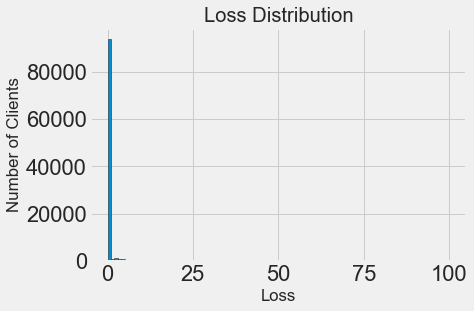

In [9]:
for i in data.select_dtypes(include=['object']).columns:
    data.drop(labels=i, axis=1, inplace=True)
figsize=(8, 8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(data['loss'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')

In [10]:
# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
f33          NaN
f34          NaN
f35          NaN
f37          NaN
f38          NaN
f678         NaN
f700         NaN
f701         NaN
f702         NaN
f736         NaN
f764         NaN
Name: loss, dtype: float64


### Feature selection and (non)/linear models

#### Linear Feature Selection and models
Find correlation of default

In [11]:
for i in data.columns:
    if len(set(data[i]))==1:
        data.drop(labels=[i], axis=1, inplace=True)

In [12]:
# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f282    0.010726
f251    0.010915
f221    0.010968
f556    0.011575
f675    0.011606
f13     0.011933
f68     0.013375
f599    0.014165
f597    0.014165
f670    0.014811
f67     0.015012
f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
Name: loss, dtype: float64


In [13]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['loss'] = y
               
    return x

In [15]:
linear_data = remove_collinear_features(data, 0.7)

In [17]:
features = linear_data.drop(columns=['id','loss'])
targets = pd.DataFrame(linear_data['loss'])

In [25]:
def default(loss):
    if loss >0:
        return 1
    else:
        return 0
    
targets['target']=targets['loss'].apply(default)

#### Logistic Regression

In [61]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

In [62]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train.target).reshape((-1, ))
y_test = np.array(y_test.target).reshape((-1, ))

In [64]:
# Function to calculate mean absolute error, loss function
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_score= model.decision_function(X_test)
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross,model_score,model_pred

In [65]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty="l1")
logistic_cross,logistic_score,_ = fit_and_evaluate(logisticRegr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logistic_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.9069


In [70]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test,logistic_score)
roc_auc = auc(fpr, tpr)

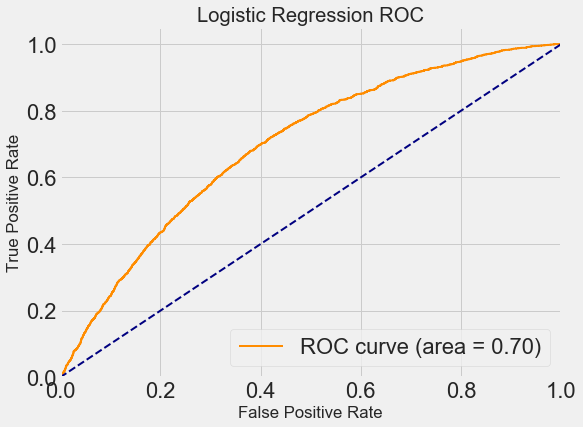

In [171]:
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

#### Nonlinear Feature Selection and models
Find information gain

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

y=pd.DataFrame(data["loss"])
y['target']=y['loss'].apply(default)
X_df=data.drop(columns=['id','loss'])

In [135]:
X = sc.fit_transform(X_df)

clf = RandomForestClassifier()
clf.fit(X,y.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    print ("The 5 worst features selected by this method are :")
    for i in range(5):
        print(scores[len(scores)-1-i][1])

In [136]:
scores = []
for i in range(X.shape[1]):
    scores.append((clf.feature_importances_[i],X_df.columns[i]))

In [120]:
print_best_worst(scores)

The 5 best features selected by this method are :
f67
f282
f404
f655
f332
The 5 worst features selected by this method are :
f33
f34
f35
f37
f38


In [131]:
scores.sort()
scores

[(0.0, 'f33'),
 (0.0, 'f34'),
 (0.0, 'f35'),
 (0.0, 'f37'),
 (0.0, 'f38'),
 (0.0, 'f678'),
 (0.0, 'f700'),
 (0.0, 'f701'),
 (0.0, 'f702'),
 (0.0, 'f736'),
 (0.0, 'f764'),
 (5.8289149887784907e-05, 'f724'),
 (6.291671745410531e-05, 'f777'),
 (0.00017744610134742784, 'f723'),
 (0.00017867658293616842, 'f293'),
 (0.00022440949730613652, 'f776'),
 (0.0002560561823694206, 'f595'),
 (0.0002660864884970283, 'f338'),
 (0.000318913775242226, 'f73'),
 (0.00031893116876644553, 'f291'),
 (0.000320158111173443, 'f741'),
 (0.00032718104197523585, 'f427'),
 (0.00033894843810305296, 'f207'),
 (0.00036022008300329805, 'f604'),
 (0.0003680748508144069, 'f625'),
 (0.00037542562267255835, 'f417'),
 (0.0003861004265241965, 'f633'),
 (0.0003917504455111296, 'f644'),
 (0.00039878736829191146, 'f420'),
 (0.00040891745461393717, 'f616'),
 (0.00041627843612077937, 'f317'),
 (0.0004200174203806476, 'f152'),
 (0.00043411893632622743, 'f304'),
 (0.0004407591236776096, 'f362'),
 (0.0004424259231710164, 'f371'),
 (0

In [158]:
#Set a threshold imformation gain 0.0005
num=0
features=[]
for score, feature in scores:
    if score < 0.0001:
        features.append(feature)
        print (feature)
        num+=1

f33
f34
f35
f37
f38
f678
f700
f701
f702
f723
f724
f736
f764
f777


In [162]:
X_df.drop(columns=features,inplace=True)

#### Random Forest Classification

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train.target).reshape((-1, ))
y_test = np.array(y_test.target).reshape((-1, ))

In [184]:
random_forest = RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=10)
random_forest.fit(X_train,y_train)

# Actual class predictions
rf_predictions = random_forest.predict(X_test)
# Probabilities for each class
rf_probs = random_forest.predict_proba(X_test)[:, 1]

In [185]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test,rf_probs)
roc_auc = auc(fpr, tpr)

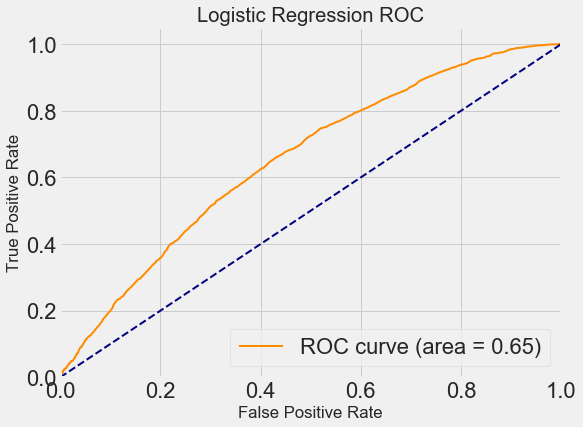

In [186]:
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()